In [140]:
import matplotlib.pyplot as plt  # package for data visualization.
import cv2  # package for image processing.
import numpy as np  # package for fast array & matrix manipulation processes.

In [141]:
# store image paths in a list
file_names: list = ['cat1.jpg', 'cat2.jpg', 'cat3.jpg', 'dog1.jpg']

In [142]:
# a function to provide DRY
def read() -> list:
    """
    Reads images from paths which are inside file_names list.
    :return: list of image numpy arrays
    """
    global file_names
    return [cv2.cvtColor(cv2.imread(f'./{file_name}'),cv2.COLOR_BGR2RGB) \
            for file_name in file_names]

In [143]:
# store cat & dog images as numpy array
images: list = read()
aux: list = [[images[0]], [images[1]], [images[2]], [images[3]]]

In [144]:
# plot each image & print their shape
def render() -> None:
    """
        Plot each image inside images.
        :return: None
    """
    global images
    for img in images:
        plt.imshow(img)
        plt.show()
    return None

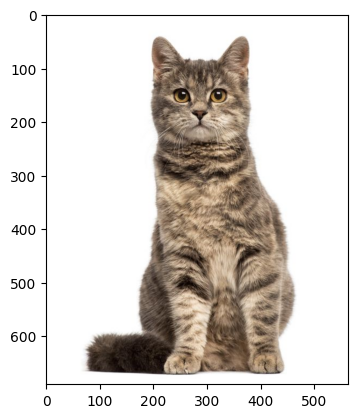

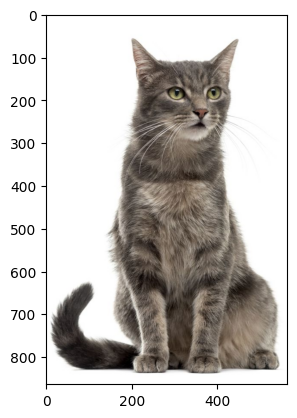

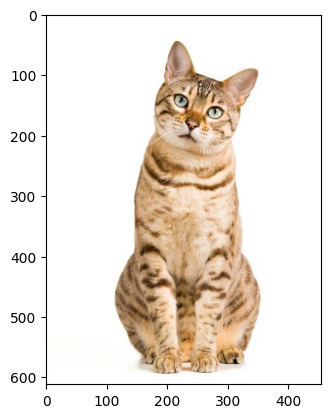

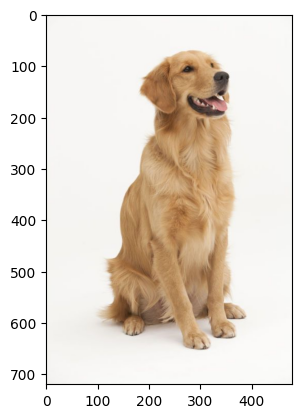

In [145]:
render()

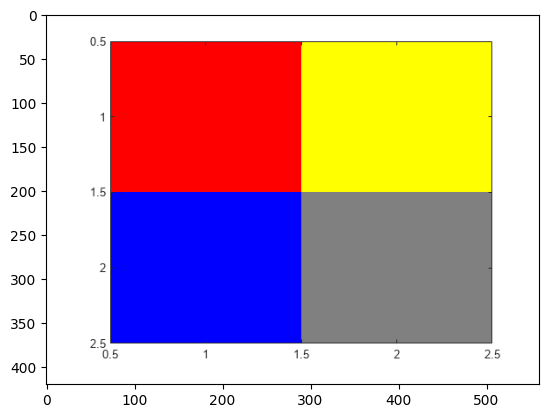

In [146]:
# read the image given in Fig.2. into a numpy array & print the shape of it
color_template: np.ndarray = cv2.cvtColor(cv2.imread('./color_template.png'), cv2.COLOR_BGR2RGB)
plt.imshow(color_template)
plt.show()

In [147]:
# convert RGB to YIQ
def rgb2_yiq(img: np.ndarray) -> np.ndarray:
    """
    [Y, I, Q] = [ [0.2990, +0.5870, +0.1140], [0.5959, -0.2746,-0.3213], [0.2115, -0.5227, +0.3112] ]  * [R, G, B]
    :param img: RGB formatted image
    :return: YIQ format of given RGB formatted image
    """
    result: np.ndarray = np.zeros(img.shape)
    row, col, depth = img.shape
    mask: np.ndarray = np.array([[+0.2990, +0.5870, +0.1140],
                                 [+0.5959, -0.2746, -0.3213],
                                 [+0.2115, -0.5227, +0.3112]], dtype=float)
    for i in range(0, row):
        for j in range(0, col):
            # img[row, column, [R, G, B]]
            result[i, j, ] = np.dot(mask, img[i, j, ])
    return result

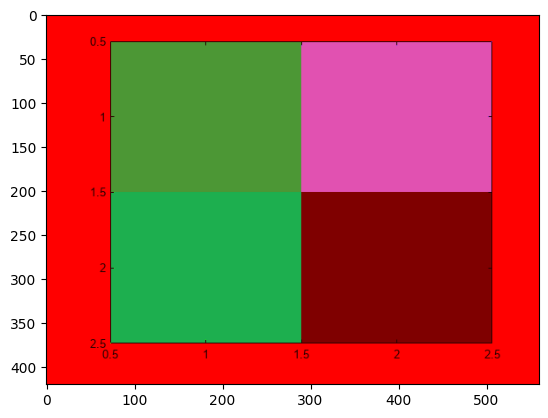

In [148]:
# call the function, render the result
yiq = rgb2_yiq(color_template)
plt.imshow(yiq.astype('uint8'))
plt.show()

In [149]:
def yiq2_rgb(img: np.ndarray) -> np.ndarray:
    """
    [R, G, B] = [[1, 0.956, 0.619], [1, -0.272, -0.647], [1, -1.106, 1.703]] * [Y, I, Q]
    :param img: YIQ formatted image
    :return: RGB format of given YIQ formatted image
    """
    row, col, depth = img.shape
    result: np.ndarray = np.zeros(img.shape)
    mask: np.ndarray = np.array([[+1, +0.956, +0.619],
                        [+1, -0.272, -0.647],
                        [+1, -1.106, +1.703]], dtype=float)
    for i in range(0, row):
        for j in range(0, col):
            result[i, j, ] = np.dot(mask, img[i, j, ])
    return result

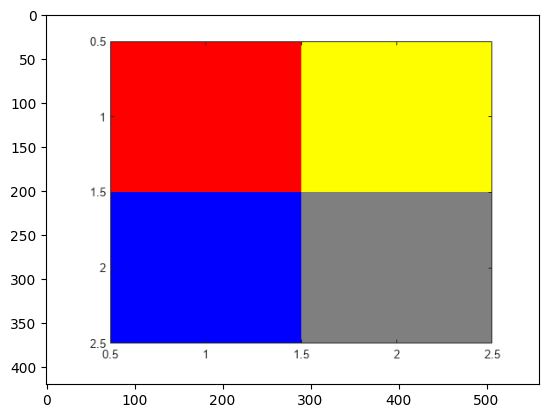

In [150]:
# call the function, render the result
rgb = yiq2_rgb(yiq)
plt.imshow(rgb.astype('uint8'))
plt.show()

## There are 5 operations to apply on images
<hr/>
<ol>
    <li>Flip vertically</li>
    <li>Flip horizontally</li>
    <li>Rotate counterclockwise by 90 degrees</li>
    <li>Rotate clockwise by 90 degrees</li>
    <li>Resize to half by keeping aspect ratio</li>
    </ol>

In [151]:
def flip(axis: int) -> None:
    """
    Flips the image based on given axis.
    :param axis: Vertical or horizontal axis.
    :return: None
    """
    global images # cat & dog images
    for i in range(len(images)):
        # images[i] = cv2.flip(images[i], axis)
        aux[i].append(cv2.flip(images[i], axis))
    return None

In [152]:
def rotate(rotate_code) -> None:
    """
    Rotates the image based on given rotation code.
    :param rotate_code: Rotation type.
    :return: None
    """
    global images # cat & dog images
    for i in range(len(images)):
        # images[i] = cv2.rotate(images[i], rotate_code)
        aux[i].append(cv2.rotate(images[i], rotate_code))
    return None

In [153]:
def resize(ratio: int = 50) -> None:
    """
    Resizes the image based on the given ratio.
    :param ratio: Resize percent, default is 50%
    :return: None
    """
    global images # cat & dog images
    for i in range(len(images)):
        # images[i] = cv2.resize(src=images[i], dsize=(int(images[i].shape[1] * ratio/100), int(images[i].shape[0] * ratio/100)))
        aux[i].append(cv2.resize(src=images[i], dsize=(int(images[i].shape[1] * ratio/100), int(images[i].shape[0] * ratio/100))))
    return None

In [154]:
VERTICAL_AXIS: int = 1
HORIZONTAL_AXIS: int = 0
CLOCKWISE_90 = cv2.ROTATE_90_CLOCKWISE
CT_CLOCKWISE_90 = cv2.ROTATE_90_COUNTERCLOCKWISE

In [155]:
flip(VERTICAL_AXIS)

In [156]:
flip(HORIZONTAL_AXIS)

In [157]:
rotate(CT_CLOCKWISE_90)

In [158]:
rotate(CLOCKWISE_90)

In [159]:
resize()

In [160]:
titles = ['original', 'horizontal flip', 'vertical flip', 'rotate -90', 'rotate +90', 'half size']

In [161]:
def compare() -> None:
    """
        Compares initial & modified versions of images by monitoring them using matplotlib.
        :return: None
    """
    fig, ax = plt.subplots(nrows=len(aux), ncols=len(aux[0]), figsize=(20, 20))
    for i in range(len(aux)):
        for j in range(len(aux[0])):
            ax[i, j].imshow(aux[i][j])
            ax[i, j].set_title(titles[j] if j != 5 and j != 0 else f'{titles[j]}, {aux[i][j].shape[0]}x{aux[i][j].shape[1]}')
    plt.show()
    return None

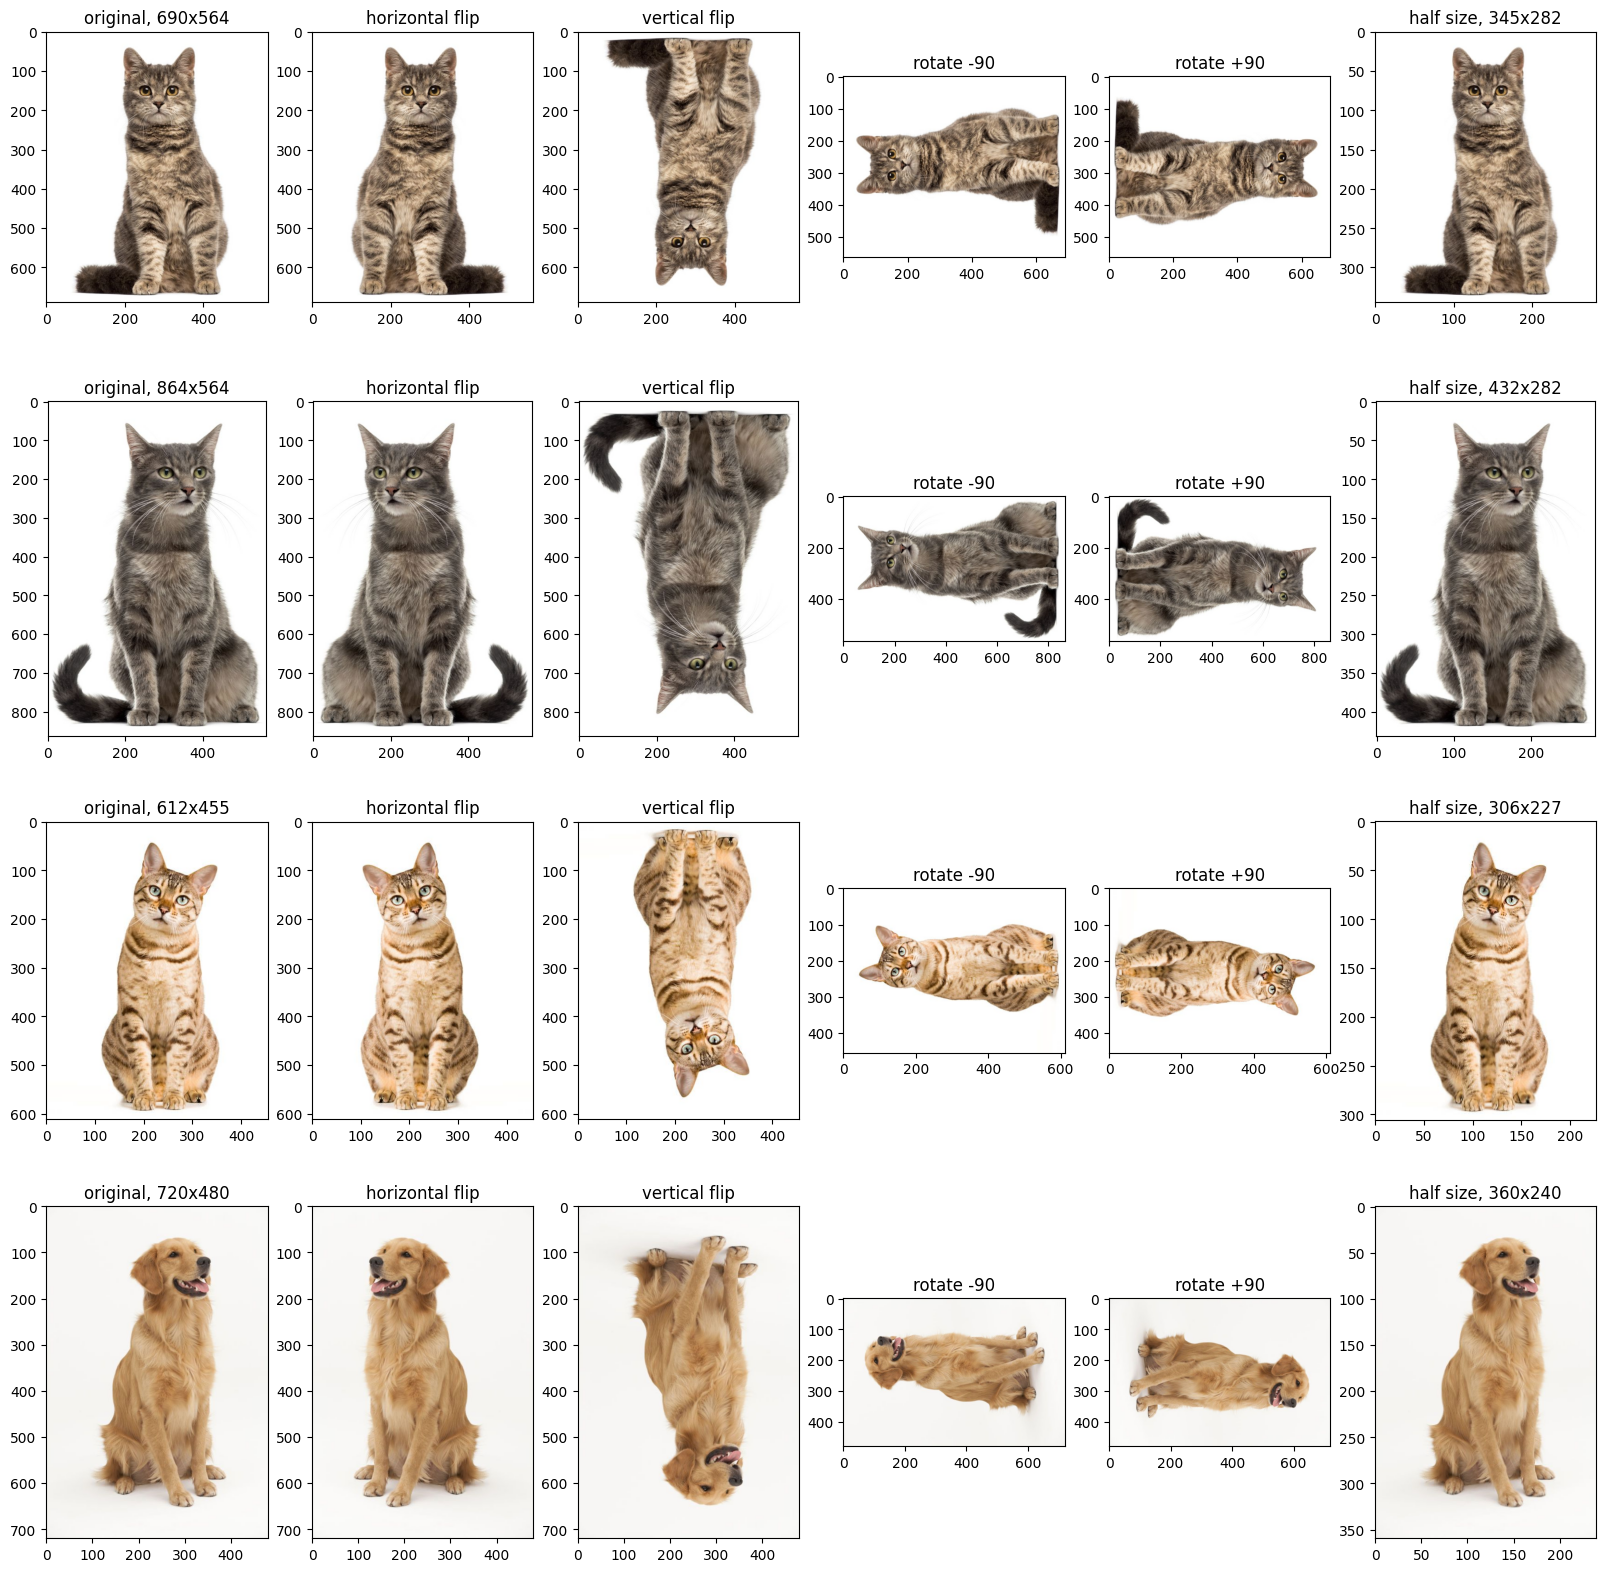

In [162]:
compare()